In [1]:
import pandas as pd

In [4]:
black_friday = pd.read_csv("BlackFriday.csv")

In [7]:
black_friday.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [9]:
black_friday.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [11]:
black_friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [14]:
black_friday.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [15]:
import matplotlib.pyplot as plt
import numpy

In [23]:
black_friday.groupby("Age").agg('mean')

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Age,,,,,,,
0-17,1.002676e+06,8.790236,0.000000,4.936357,9.023027,11.850282,9020.126878
18-25,1.002766e+06,6.737141,0.211412,5.003359,9.474317,12.395286,9235.197575
26-35,1.003075e+06,7.902343,0.392035,5.217085,9.810403,12.648689,9314.588970
36-45,1.003030e+06,8.847152,0.395418,5.387613,9.954321,12.750717,9401.478758
46-50,1.003152e+06,8.526367,0.723038,5.629587,10.177195,12.937952,9284.872277
51-55,1.002950e+06,8.809506,0.717183,5.649662,10.280446,13.108187,9620.616620
55+,1.002951e+06,9.537961,0.634981,5.896570,10.462992,13.154686,9453.898579


In [49]:
age_groupe = black_friday.groupby("Age")
age_groupe.count()
age_groupe["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,14707.0,9020.126878,5060.498917,187.0,5365.0,8009.0,11904.50,23955.0
18-25,97634.0,9235.197575,4995.723417,185.0,5439.0,8041.0,12044.00,23958.0
26-35,214690.0,9314.588970,4974.081415,185.0,5833.0,8043.0,12063.00,23961.0
36-45,107499.0,9401.478758,4978.252054,185.0,5910.0,8076.0,12131.00,23960.0
46-50,44526.0,9284.872277,4921.253566,186.0,5921.0,8050.0,12021.75,23960.0
51-55,37618.0,9620.616620,5035.326515,187.0,6056.0,8172.0,12578.50,23960.0
55+,20903.0,9453.898579,4939.124514,187.0,6068.0,8127.0,11976.00,23960.0


In [50]:
achat_groupe_age = {}
for age, info in age_groupe:
    print(age)
    print(info)
    achat_groupe_age[age]=sum(info["Purchase"])
    

0-17
        User_ID Product_ID Gender   Age  Occupation City_Category  \
0       1000001  P00069042      F  0-17          10             A   
1       1000001  P00248942      F  0-17          10             A   
2       1000001  P00087842      F  0-17          10             A   
3       1000001  P00085442      F  0-17          10             A   
85      1000019  P00112542      M  0-17          10             A   
...         ...        ...    ...   ...         ...           ...   
537280  1004690  P00242742      F  0-17          10             C   
537281  1004690  P00226442      F  0-17          10             C   
537282  1004690  P00181442      F  0-17          10             C   
537283  1004690  P00192042      F  0-17          10             C   
537354  1004707  P00253042      M  0-17           0             C   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                   

In [64]:
achat_groupe_age
achat_groupe_age.keys()
achat_groupe_age.values()

dict_values([132659006, 901669280, 1999749106, 1010649565, 413418223, 361908356, 197614842])

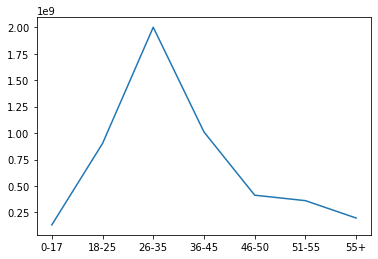

In [66]:
plt.plot(list(achat_groupe_age.keys()),list(achat_groupe_age.values()))
plt.draw()

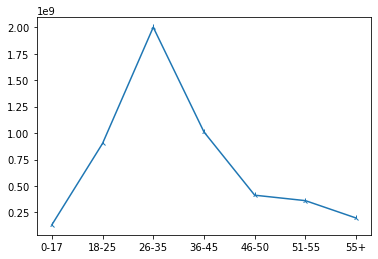

In [82]:
plt.plot(list(achat_groupe_age.keys()),list(achat_groupe_age.values()),marker='2')
plt.draw()

### Enlever le linechart

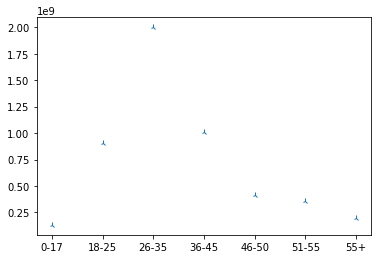

In [84]:
plt.plot(list(achat_groupe_age.keys()),list(achat_groupe_age.values()),marker='2',linestyle="")
plt.draw()

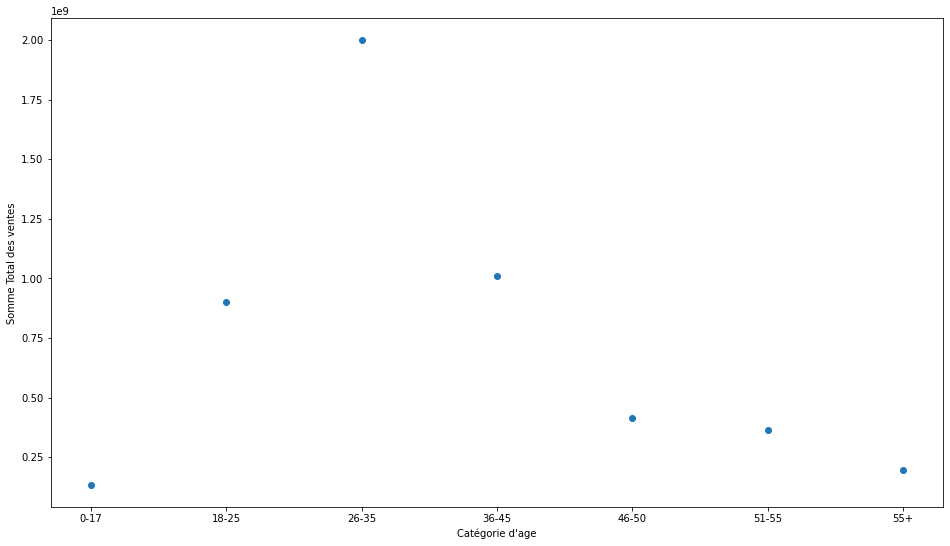

In [109]:
plt.plot(list(achat_groupe_age.keys()),list(achat_groupe_age.values()),marker='o',linestyle="")
plt.xlabel("Catégorie d'age")
plt.ylabel("Somme Total des ventes")

plt.draw()

### Monter le titre de graphe y=1.05 

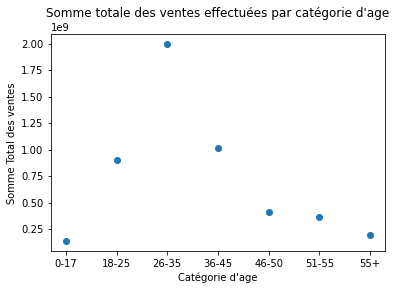

In [89]:
plt.plot(list(achat_groupe_age.keys()),list(achat_groupe_age.values()),marker='o',linestyle="")
plt.xlabel("Catégorie d'age")
plt.ylabel("Somme Total des ventes")
plt.title("Somme totale des ventes effectuées par catégorie d'age", y=1.05)
plt.draw()

### Agrandir le graphe

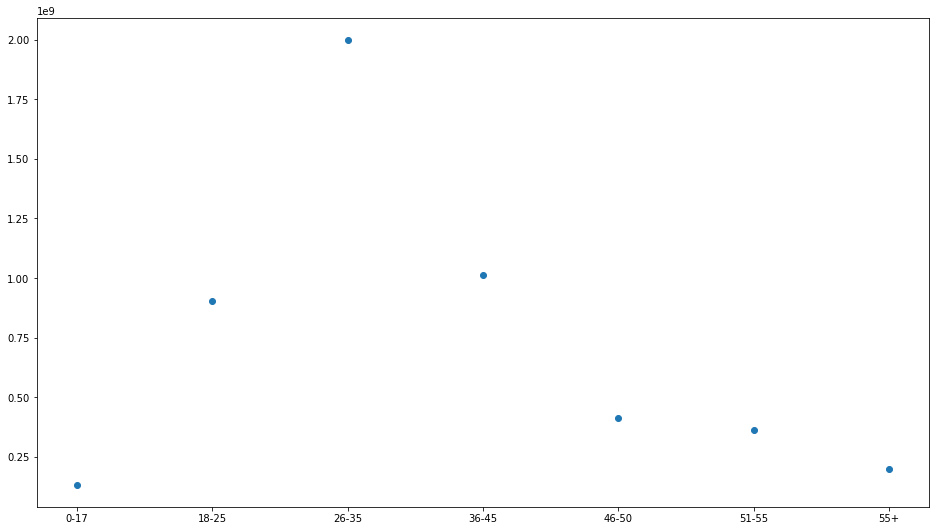

In [93]:
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(list(achat_groupe_age.keys()),list(achat_groupe_age.values()))
plt.draw()

### Ajout des couleur pour les points  c=list(achat_groupe_age.values()) 

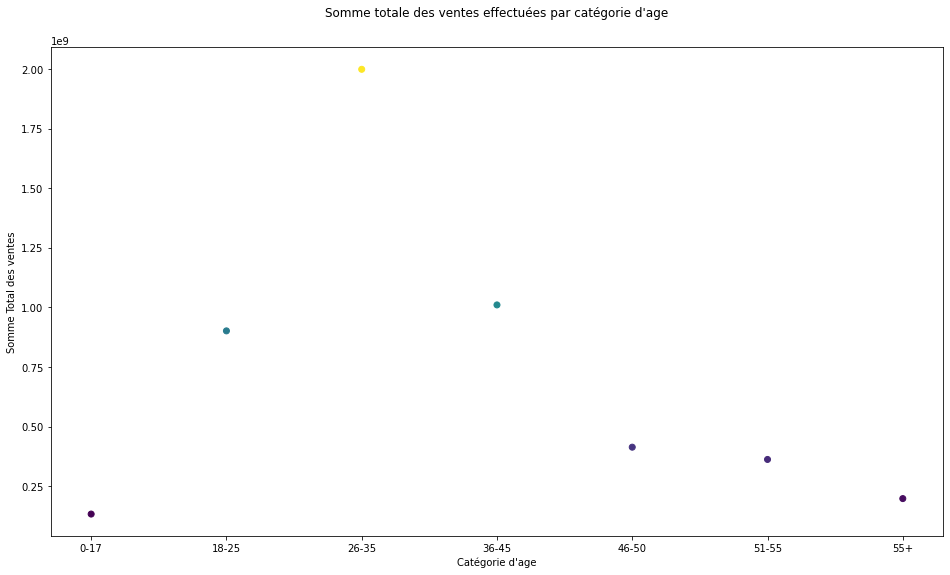

In [95]:
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(list(achat_groupe_age.keys()),list(achat_groupe_age.values()),c=list(achat_groupe_age.values()))
plt.xlabel("Catégorie d'age")
plt.ylabel("Somme Total des ventes")
plt.title("Somme totale des ventes effectuées par catégorie d'age", y=1.05)

plt.draw()

### Ajouter les lengendes sur le graphique 

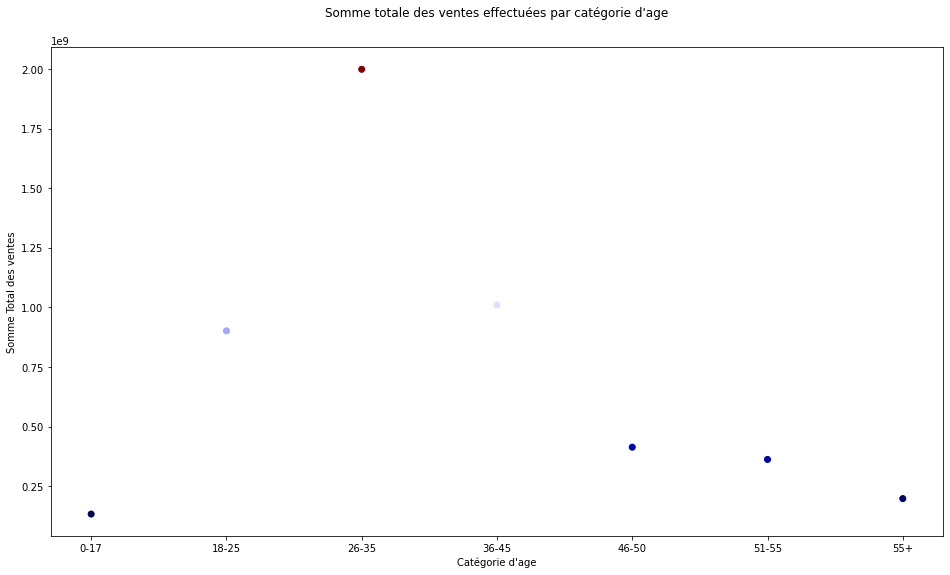

In [96]:
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(list(achat_groupe_age.keys()),list(achat_groupe_age.values()),c=list(achat_groupe_age.values()),cmap="seismic")
plt.xlabel("Catégorie d'age")
plt.ylabel("Somme Total des ventes")
plt.title("Somme totale des ventes effectuées par catégorie d'age", y=1.05)

plt.draw()

### Ajout de la barre de graduation des couleurs 

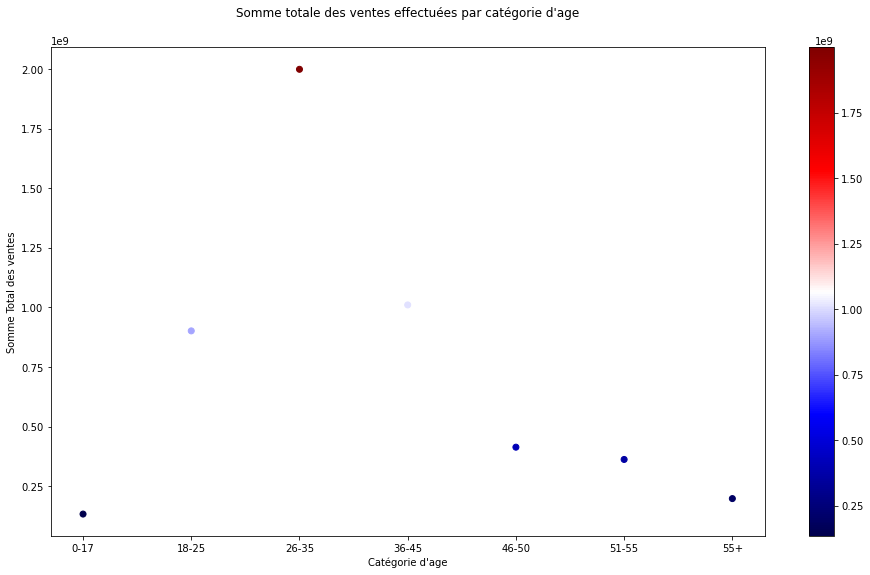

In [98]:
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(list(achat_groupe_age.keys()),list(achat_groupe_age.values()),c=list(achat_groupe_age.values()),cmap="seismic")
plt.xlabel("Catégorie d'age")
plt.ylabel("Somme Total des ventes")
plt.title("Somme totale des ventes effectuées par catégorie d'age", y=1.05)
plt.colorbar(orientation="vertical")
plt.draw()

### Changer la forme des points avec marker 

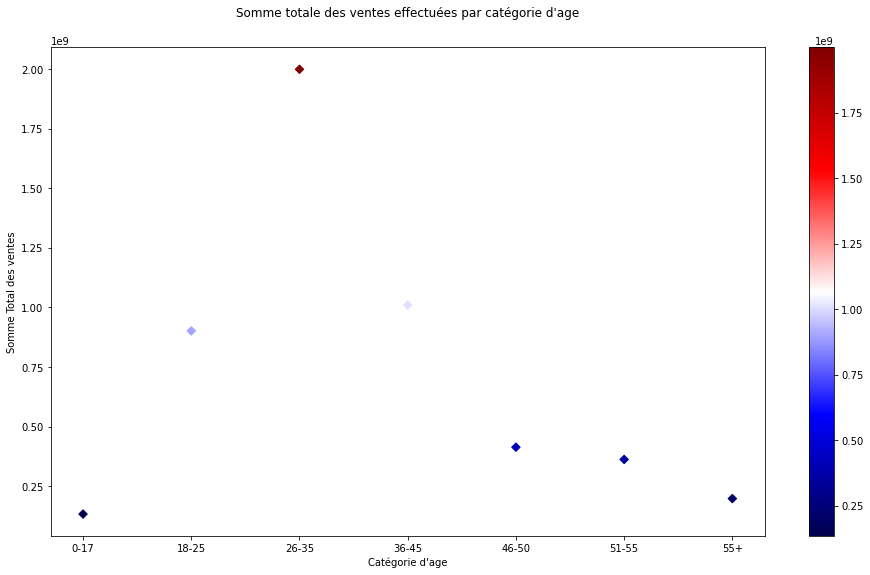

In [100]:
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(list(achat_groupe_age.keys()),list(achat_groupe_age.values()),c=list(achat_groupe_age.values()),cmap="seismic",marker="D")
plt.xlabel("Catégorie d'age")
plt.ylabel("Somme Total des ventes")
plt.title("Somme totale des ventes effectuées par catégorie d'age", y=1.05)
plt.colorbar(orientation="vertical")
plt.draw()

### Agrandir le size des points

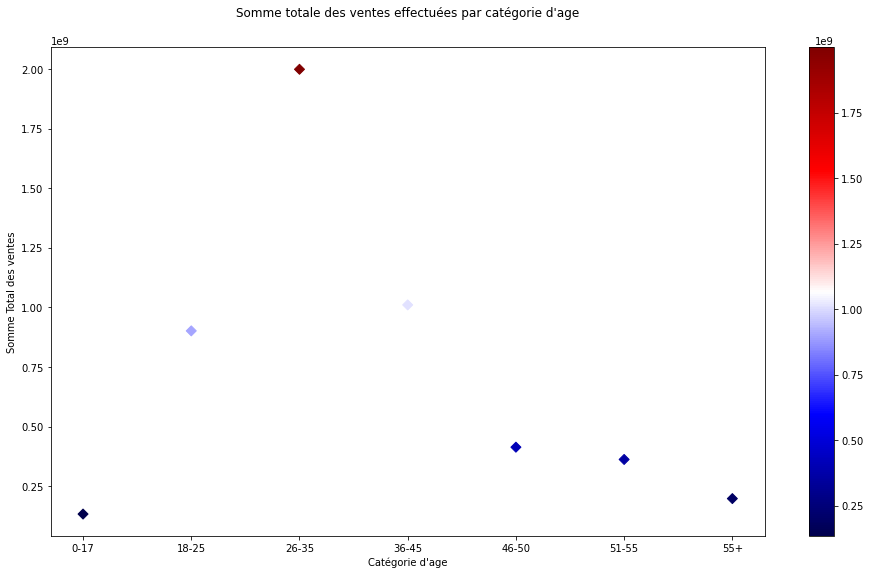

In [103]:
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(list(achat_groupe_age.keys()),list(achat_groupe_age.values()),c=list(achat_groupe_age.values()),cmap="seismic",marker="D",s=50)
plt.xlabel("Catégorie d'age")
plt.ylabel("Somme Total des ventes")
plt.title("Somme totale des ventes effectuées par catégorie d'age", y=1.05)
plt.colorbar(orientation="vertical")
plt.draw()

### Enregistrer un graphique  

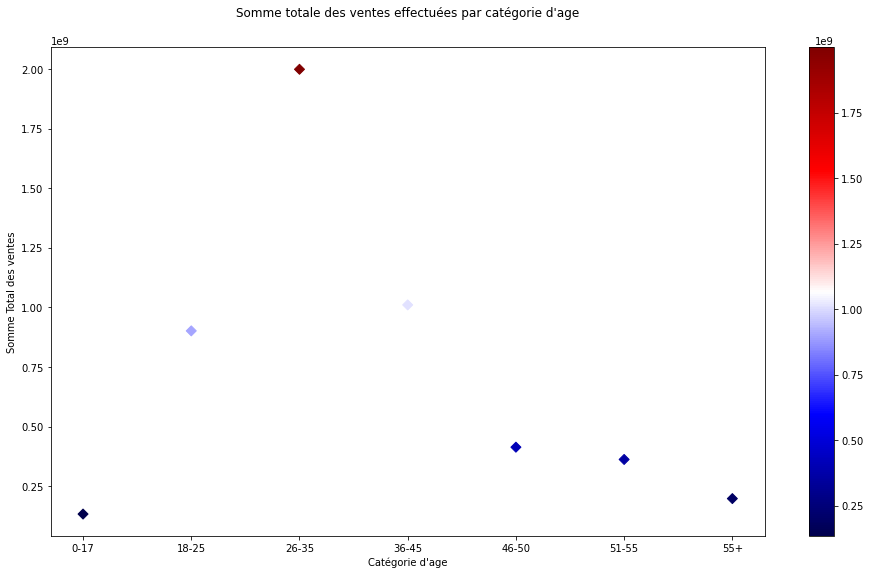

In [107]:
plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(list(achat_groupe_age.keys()),list(achat_groupe_age.values()),c=list(achat_groupe_age.values()),cmap="seismic",marker="D",s=50)
plt.xlabel("Catégorie d'age")
plt.ylabel("Somme Total des ventes")
plt.title("Somme totale des ventes effectuées par catégorie d'age", y=1.05)
plt.colorbar(orientation="vertical")
plt.draw()
#fonction savefig + meilleur qualité bbox_inches ( mais pas obligatoire)
plt.savefig("mongraphique1.png", bbox_inches = "tight")

### diagrame en baton 
#### combien les femmes et d'hommes ont depensé pendant le blackfriday

In [131]:
data_fareme_gender = black_friday.groupby("Gender")
data_fareme_gender
dict_age = dict()
for gender, info in data_fareme_gender:
    dict_age[gender]= sum(info["Purchase"])

dict_age

{'F': 1164624021, 'M': 3853044357}

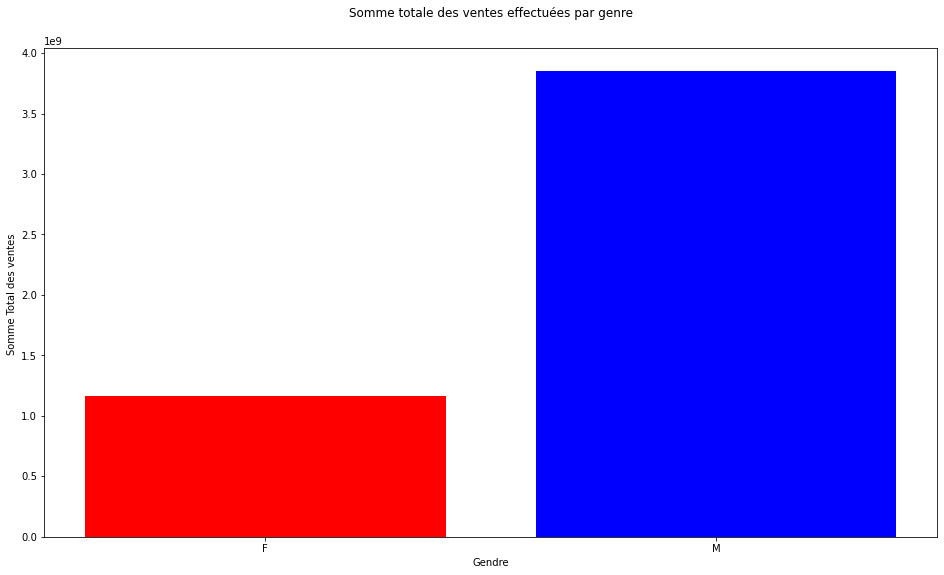

In [156]:
plt.bar(list(dict_age.keys()),list(dict_age.values()),color=['red','blue'])
plt.xlabel("Gendre")
plt.ylabel("Somme Total des ventes ")
plt.title("Somme totale des ventes effectuées par genre", y=1.05)

plt.draw()

### Le nombre des femmes et des hommes qui ont depensé pendant le black friday

In [152]:
data_frame_gender_count = black_friday["Gender"].value_counts()
data_frame_gender_count

M    405380
F    132197
Name: Gender, dtype: int64

In [153]:
type(data_frame_gender_count)

pandas.core.series.Series

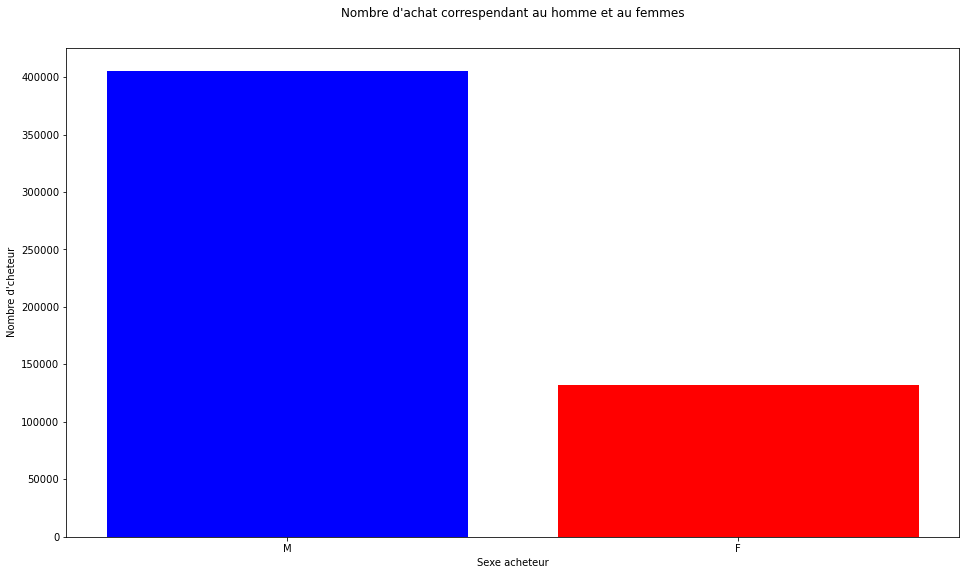

In [161]:
plt.rcParams["figure.figsize"]=[16,9]
plt.bar(data_frame_gender_count.index,data_frame_gender_count,color=['blue','red'])
plt.xlabel("Sexe acheteur")
plt.ylabel("Nombre d'cheteur")
plt.title("Nombre d'achat correspendant au homme et au femmes", y=1.05)
plt.draw()

### la somme mediane depensé ce jour la 

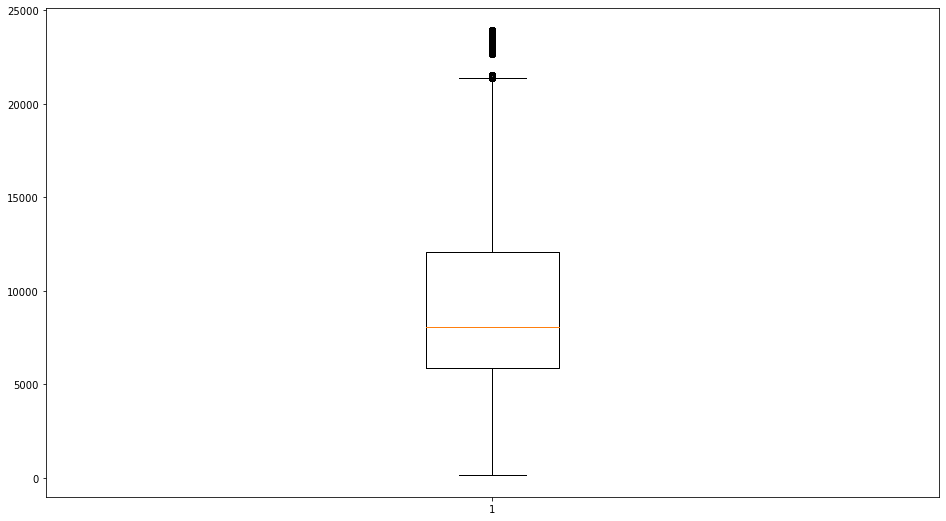

In [167]:
plt.rcParams["figure.figsize"]=[16,9]
plt.boxplot(black_friday["Purchase"])
plt.draw()

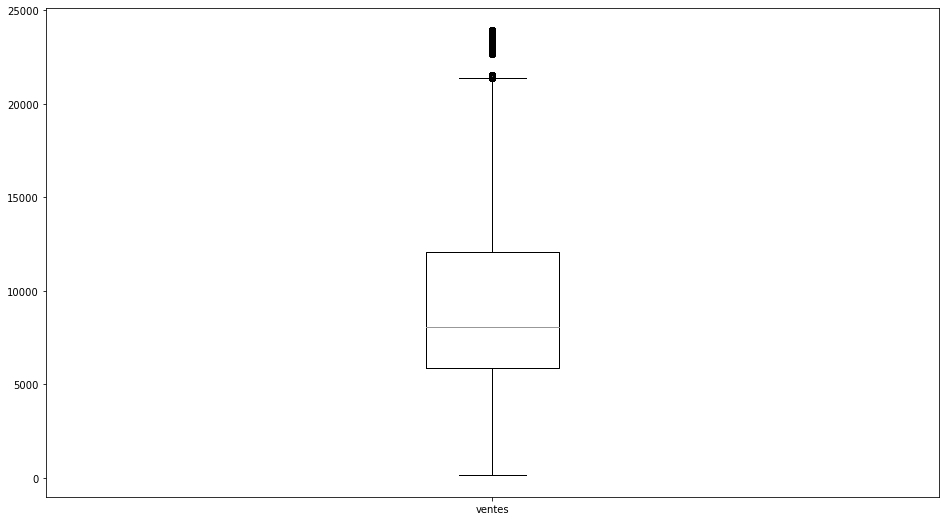

In [168]:
plt.rcParams["figure.figsize"]=[16,9]
plt.boxplot(black_friday["Purchase"])
plt.xticks([1],["ventes"])
plt.draw()

### Pourcentage d'age visité le magasin ce black friday 

In [179]:
data_age = black_friday["Age"].value_counts()
data_age.index
data_age.values

array([214690, 107499,  97634,  44526,  37618,  20903,  14707],
      dtype=int64)

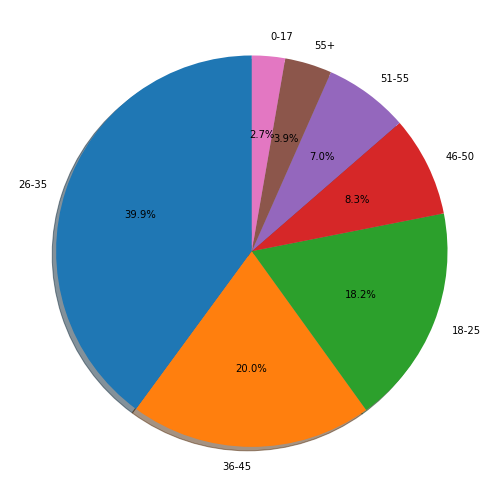

In [182]:
plt.rcParams["figure.figsize"]=[9,9]
plt.pie(data_age.values, labels=data_age.index, autopct='%1.1f%%', shadow=True, startangle=90) 
plt.draw()

### mettre plusieur figures dans un meme graphe

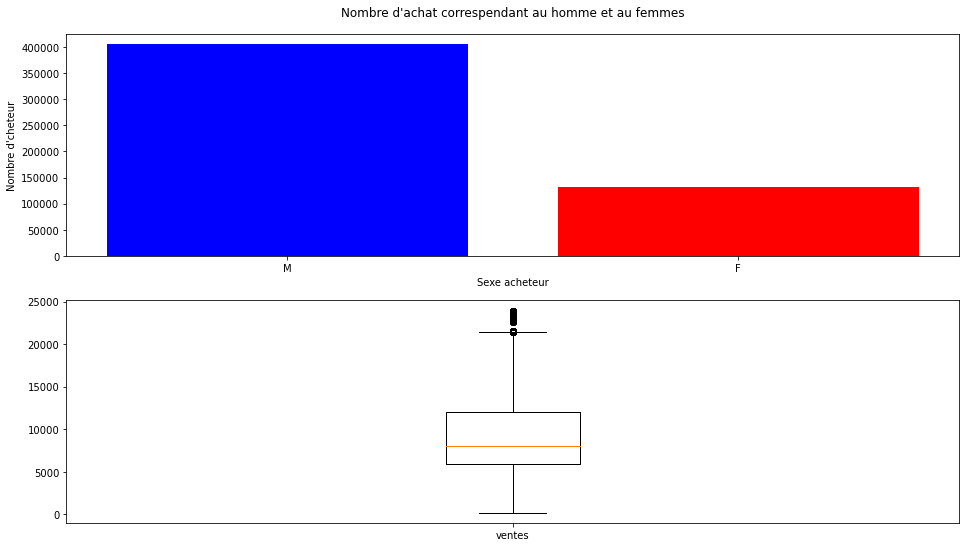

In [184]:
plt.rcParams["figure.figsize"]=[16,9]
#(211)-> 21: couper le graphique en 2 lignes et 1 colonne 1->l'emplacmeent sur lequel je veux mettre ma première figure
plt.subplot(211)
plt.bar(data_frame_gender_count.index,data_frame_gender_count,color=['blue','red'])
plt.xlabel("Sexe acheteur")
plt.ylabel("Nombre d'cheteur")
plt.title("Nombre d'achat correspendant au homme et au femmes", y=1.05)

plt.subplot(212)
plt.rcParams["figure.figsize"]=[16,9]
plt.boxplot(black_friday["Purchase"])
plt.xticks([1],["ventes"])

plt.draw()

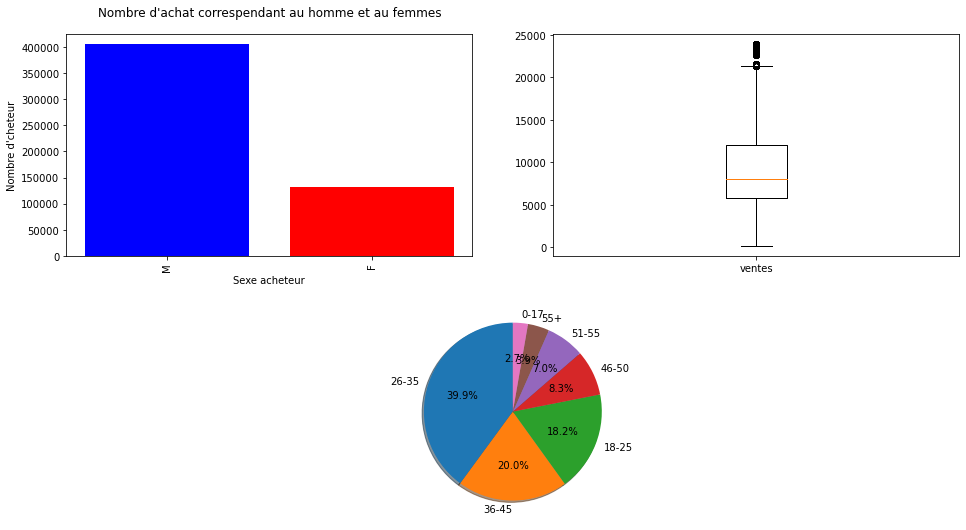

In [192]:
plt.rcParams["figure.figsize"]=[16,9]
#(211)-> 21: couper le graphique en 2 lignes et 1 colonne 1->l'emplacmeent sur lequel je veux mettre ma première figure
plt.subplot(221)
plt.bar(data_frame_gender_count.index,data_frame_gender_count,color=['blue','red'])
plt.xticks(rotation="vertical")
plt.xlabel("Sexe acheteur")
plt.ylabel("Nombre d'cheteur")
plt.title("Nombre d'achat correspendant au homme et au femmes", y=1.05)

plt.subplot(222)
plt.boxplot(black_friday["Purchase"])
plt.xticks([1],["ventes"])
plt.subplot(212)
plt.pie(data_age.values, labels=data_age.index, autopct='%1.1f%%', shadow=True, startangle=90) 

plt.draw()

# utilisation seaborn

In [193]:
import seaborn as sns

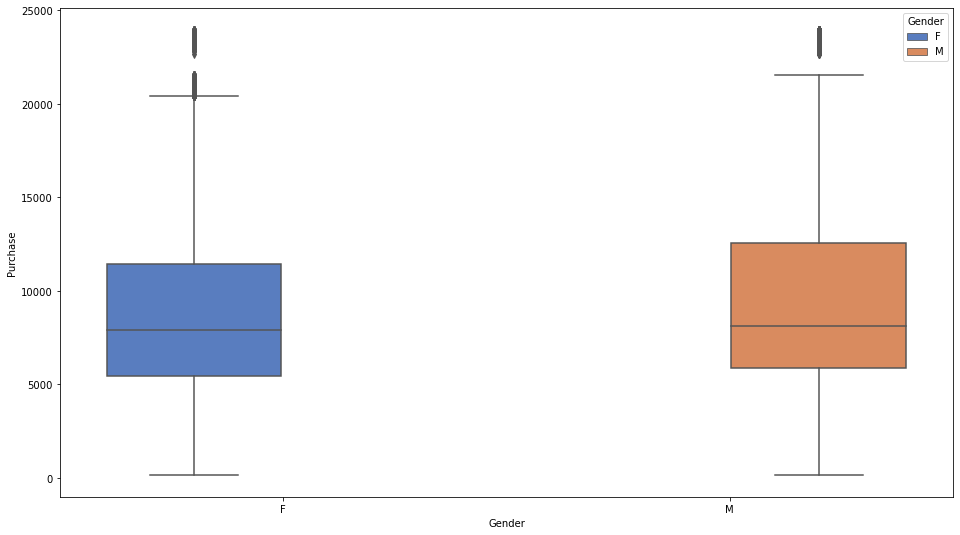

In [198]:
#Set1 : palette des couleurs, muted aussi
sns.boxplot(x="Gender",y="Purchase", hue="Gender", data= black_friday, palette="muted")
plt.draw()

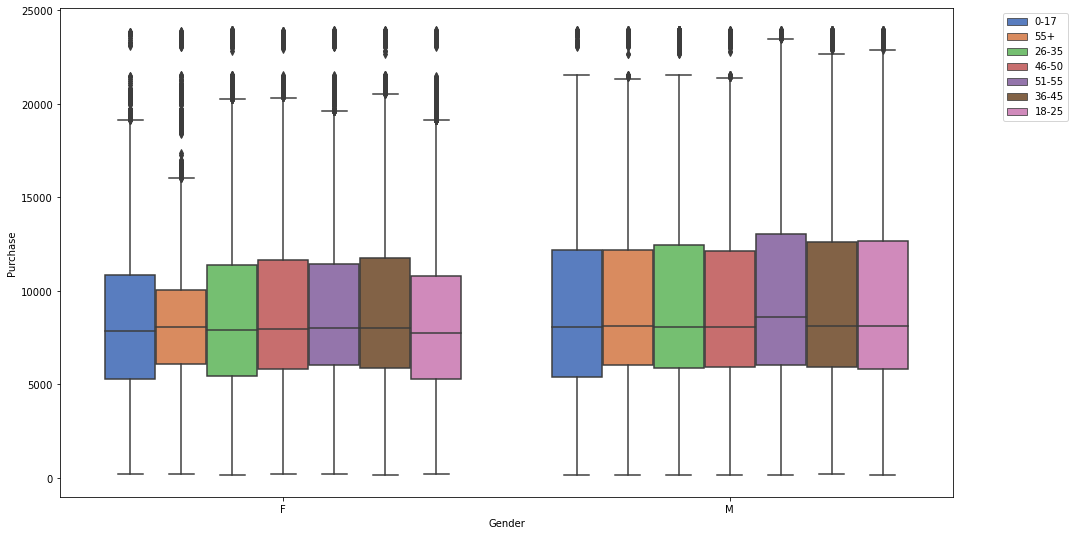

In [206]:
sns.boxplot(x="Gender",y="Purchase", hue="Age", data= black_friday, palette="muted")
# borderaxespad=0. on peut ne pas la mettre
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.draw()

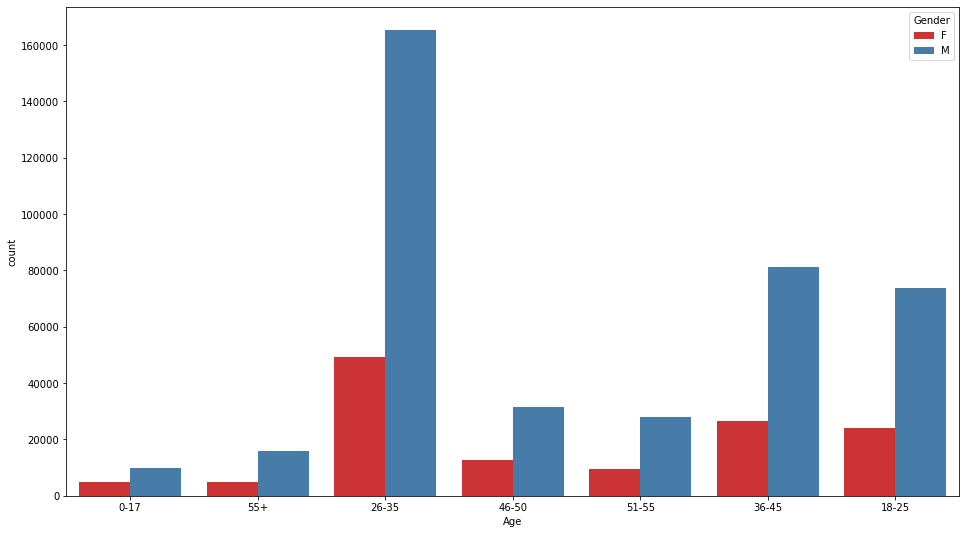

In [210]:
#hue : pour separer le graphique selon un critère
sns.countplot(x="Age", hue="Gender", data=black_friday, palette="Set1")
plt.draw()

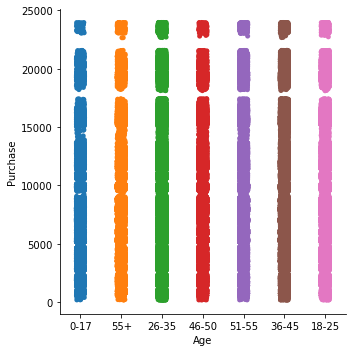

In [225]:
sns.catplot(x="Age",y="Purchase", data=black_friday)

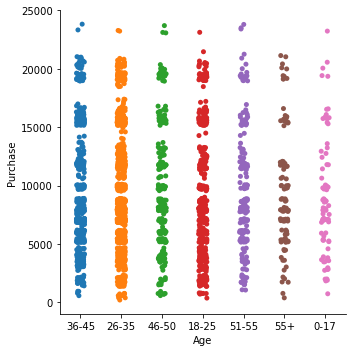

In [226]:
subset = black_friday.sample(3000)
sns.catplot(x="Age",y="Purchase", data=subset)
plt.draw()

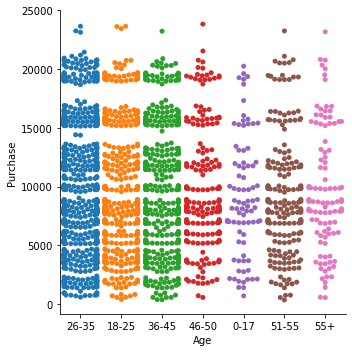

In [222]:
#Algorithme swarm qui va essayer de separer un peux les points et faire de tel sorte qu'il ne se chevauche pas 
sns.catplot(x="Age",y="Purchase", data=subset, kind="swarm")

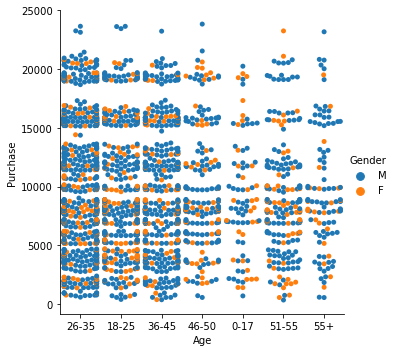

In [224]:
sns.catplot(x="Age",y="Purchase", hue="Gender", data=subset, kind="swarm")


<ipython-input-234-0c619243ebad>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)


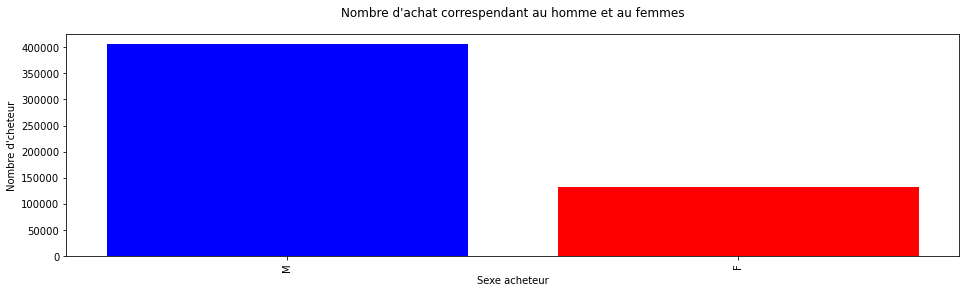

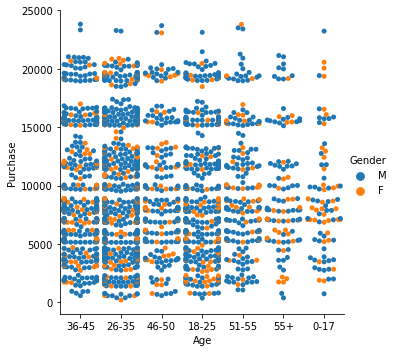

In [234]:
#(211)-> 21: couper le graphique en 2 lignes et 1 colonne 1->l'emplacmeent sur lequel je veux mettre ma première figure
plt.subplot(211)
plt.bar(data_frame_gender_count.index,data_frame_gender_count,color=['blue','red'])
plt.xticks(rotation="vertical")
plt.xlabel("Sexe acheteur")
plt.ylabel("Nombre d'cheteur")
plt.title("Nombre d'achat correspendant au homme et au femmes", y=1.05)
plt.subplot(211)
sns.catplot(x="Age",y="Purchase", hue="Gender", data=subset, kind="swarm")
plt.draw()
